In [1]:
#!Python3
# effective_panas.py - a program to practice the usage of pandas library

In [2]:
import numpy as np
import pandas as pd

In [3]:
#Chapter 7 - aggregation methods (data source in chapter 5)
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
      'vehicles.csv.zip'
df = pd.read_csv(url)
city_mpg = df.city08 # get city mpg list from df
highway_mpg = df.highway08 # get highway mpg list from df

/var/folders/_x/bt6gw2851b50zn7352f1qs_40000gn/T/ipykernel_6579/1888316542.py:4: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [4]:
#1. Find the count of non-missing values of a series
city_mpg.agg('count')

41144

In [5]:
#2. Find the number of entries in the data set
city_mpg.agg('size')

41144

In [6]:
#3. Find the number of unique entries in the list
city_mpg.agg('nunique')

105

In [7]:
#4. Find the mean of the series
city_mpg.mean()

18.369045304297103

In [8]:
#4b. Use agg to find the mean of the series
city_mpg.agg('mean')

18.369045304297103

In [9]:
#5. Find the max of the series
city_mpg.agg('max')

150

In [10]:
#Chapter 8
city_mpg = city_mpg.astype('int64').astype('category')
city_mpg

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: category
Categories (105, int64): [6, 7, 8, 9, ..., 137, 138, 140, 150]

In [11]:
sorted(set(city_mpg))

[6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 73,
 74,
 77,
 78,
 79,
 80,
 81,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 97,
 98,
 101,
 102,
 104,
 106,
 107,
 110,
 112,
 114,
 115,
 118,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 131,
 132,
 136,
 137,
 138,
 140,
 150]

In [12]:
values = pd.Series(sorted(set(city_mpg)))
city_type = pd.CategoricalDtype(categories=values,
            ordered=True)
city_mpg.astype(city_type)

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: category
Categories (105, int64): [6 < 7 < 8 < 9 ... 137 < 138 < 140 < 150]

In [13]:
#1. Convert numeric column to smaller type
highway_mpg_int16 = highway_mpg.astype('int16').memory_usage(deep=True)

In [14]:
#2. Calculate memory savings by doing so
highway_mpg.memory_usage(deep=True) - highway_mpg_int16

246864

In [15]:
#3 Convert string column into categorical type
highway_mpg_str = highway_mpg.astype('str')
cats = pd.CategoricalDtype(set(highway_mpg_str))
highway_mpg_cat = highway_mpg_str.astype(cats)
highway_mpg_cat

0        25
1        14
2        33
3        12
4        23
         ..
41139    26
41140    28
41141    24
41142    24
41143    21
Name: highway08, Length: 41144, dtype: category
Categories (92, object): ['12', '93', '24', '20', ..., '32', '34', '44', '58']

In [16]:
#4. Calculate memory savings
mb = highway_mpg_str.memory_usage(deep=True) - highway_mpg_cat.memory_usage(deep=True)
percent = mb / highway_mpg_str.memory_usage(deep=True)
print(mb, ' ', percent)

2378874   0.9798899779420397


In [17]:
# Chapter 9

In [18]:
%%timeit
#1. Create a series from a numeric column that is 'high'
# if above the mean or 'low' if below using .apply
highway_mean = highway_mpg.mean()
def highlow(val):
    if val < highway_mean:
        return 'low'
    else:
        return 'high'
highway_mpg.apply(highlow)

19.5 ms ± 8.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%%timeit
#2. Create a series from a numeric column that has the
# value 'high' if above or 'low' if below the mean
# using np.select
high = highway_mpg.gt(highway_mpg.mean())
pd.Series(np.select([high], ['high'], 'low'), index=highway_mpg.index)

4.46 ms ± 454 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
#3. Replace the missing values of a numeric series with the median
cyl = df.cylinders
cyl[cyl.isna()].fillna(cyl.median())

7138     6.0
7139     6.0
8143     6.0
8144     6.0
8146     6.0
        ... 
34563    6.0
34564    6.0
34565    6.0
34566    6.0
34567    6.0
Name: cylinders, Length: 206, dtype: float64

In [21]:
#4. Clip the values of a numeric series to between the 10th and 90th percent
cyl.dropna().clip(cyl.quantile(.1), cyl.quantile(.9)).sort_values()

0        4.0
23280    4.0
23279    4.0
23278    4.0
23277    4.0
        ... 
4133     8.0
15683    8.0
22317    8.0
8284     8.0
21338    8.0
Name: cylinders, Length: 40938, dtype: float64

In [22]:
#5. Using a categorical column, replace any values that is not
# in the top 5 /10 most frequent with 'Other'
cats = pd.CategoricalDtype(set(cyl.fillna('n/a')))
cyl_cats = cyl.fillna('n/a').astype(cats)
topX = cyl_cats.value_counts()[:6]
cyl_cats_topX = pd.Series(np.select([cyl_cats.isin(topX.index)], [cyl_cats], 'Other'))
cyl_cats_topX.value_counts()


4.0      15938
6.0      14284
8.0       8801
5.0        771
12.0       626
Other      445
3.0        279
dtype: int64

In [23]:
#8. Make a function that takes a categorical series and number(n)
# and returns a replace series that replaces any value that is not
# in the top n most frequent values with 'Other'

def top_n_other(s, n):
    top_cats = s.value_counts()[:n]
    return pd.Series(np.select([s.isin(top_cats.index)], [s], 'Other'))

top_n_other(cyl_cats, 6).value_counts()
    


4.0      15938
6.0      14284
8.0       8801
5.0        771
12.0       626
Other      445
3.0        279
dtype: int64

In [24]:
#9. Using a numeric column, bin it into 10 groups that have
# the same width
pd.cut(highway_mpg, 10).value_counts()

(20.5, 32.0]      25904
(8.885, 20.5]     11583
(32.0, 43.5]       3231
(43.5, 55.0]        226
(89.5, 101.0]        83
(101.0, 112.5]       62
(55.0, 66.5]         20
(66.5, 78.0]         14
(78.0, 89.5]         11
(112.5, 124.0]       10
Name: highway08, dtype: int64

In [25]:
#10 Using a numeric column, bin it into 10 groups that have
# equal sized bins
pd.qcut(highway_mpg, 10).value_counts()

(22.0, 24.0]     6197
(8.999, 17.0]    5548
(25.0, 27.0]     5369
(19.0, 21.0]     4326
(27.0, 29.0]     3815
(32.0, 124.0]    3657
(17.0, 19.0]     3440
(29.0, 32.0]     3254
(21.0, 22.0]     3156
(24.0, 25.0]     2382
Name: highway08, dtype: int64

In [26]:
# Chapter 10
# With a daaset of your choice:
# 1. Inspect the index
# 2. Sort the index
make = df.make
make.reset_index(drop=True)
make.index = make.index.astype('int64')
make.sort_index()

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

In [27]:
#3. Set index to monotonic incr starting at 0
make.reset_index(drop=True)
make.index.dtype

dtype('int64')

In [28]:
#4. Set inde to monotonic incr starting from 0, then convert to str
s2 = make.copy()
s2.index = make.index.astype('str')
s2.index.memory_usage(deep=True)

2539818

In [29]:
#5 Using s2, pull out the first 5 entries
s2.iloc[:5]

0    Alfa Romeo
1       Ferrari
2         Dodge
3         Dodge
4        Subaru
Name: make, dtype: object

In [30]:
#6 Using s2 pull out the last 5 entries
s2.iloc[-5:]

41139    Subaru
41140    Subaru
41141    Subaru
41142    Subaru
41143    Subaru
Name: make, dtype: object

In [31]:
# 7. Using s2, pull out 100 entries starting at position 10
s2.iloc[10:110]

10         Toyota
11     Volkswagen
12     Volkswagen
13     Volkswagen
14          Dodge
          ...    
105        Toyota
106        Toyota
107    Volkswagen
108    Volkswagen
109    Volkswagen
Name: make, Length: 100, dtype: object

In [32]:
# 8. Using s2, create a series with values with index entries '20', '10' and '2'
s2.loc[['20','10','2']]

20       BMW
10    Toyota
2      Dodge
Name: make, dtype: object

In [33]:
print(s2.index.dtype)
print(make.index.dtype)


object
int64


In [34]:
# Chapter 11 String Manipulation
survey = pd.Series(['0-10', '11-15', '11-15', '61-65', '46-50'])
survey.str.split('-', expand=True).astype('int16').mean(axis='columns').astype('int16')

0     5
1    13
2    13
3    63
4    48
dtype: int16

In [35]:
%load_ext Cython

In [36]:
%%cython
import random
def between_cy(row):
    return random.randint(*row.values)

In [37]:
%%cython
import random
import pandas as pd
cpdef int between_cy3(int x, int y):
    return random.randint(x,y)
survey = pd.Series(['0-10', '11-15', '11-15', '61-65', '46-50'])
survey.str.split('-', expand=True).astype(int)\
.apply(lambda row: between_cy3(row[0], row[1]), axis=1)

In [38]:
%prun -l 10 (survey.str.split('-', expand=True).astype(int).apply(lambda row: between_cy3(row[0], row[1]), axis=1))

         1514 function calls (1495 primitive calls) in 0.004 seconds

   Ordered by: internal time
   List reduced from 295 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 common.py:348(is_datetime64tz_dtype)
        1    0.000    0.000    0.004    0.004 {built-in method builtins.exec}
  329/327    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.000    0.000 managers.py:1937(create_block_manager_from_column_arrays)
        4    0.000    0.000    0.000    0.000 {pandas._libs.lib.maybe_convert_objects}
        5    0.000    0.000    0.000    0.000 construction.py:470(sanitize_array)
      3/2    0.000    0.000    0.001    0.000 series.py:323(__init__)
       10    0.000    0.000    0.000    0.000 series.py:943(__getitem__)
      2/1    0.000    0.000    0.000    0.000 base.py:397(__new__)
        3    0.000    0.000    0.000    0.000

In [39]:
trannys = df.trany

In [40]:
#1. Using  astring column, lowercase the values
trannys.str.lower()

0           manual 5-spd
1           manual 5-spd
2           manual 5-spd
3        automatic 3-spd
4           manual 5-spd
              ...       
41139    automatic 4-spd
41140       manual 5-spd
41141    automatic 4-spd
41142       manual 5-spd
41143    automatic 4-spd
Name: trany, Length: 41144, dtype: object

In [41]:
#2. Using a string column, slice out the first character
trannys.str.slice(start=1, stop=None, step=1)

0           anual 5-spd
1           anual 5-spd
2           anual 5-spd
3        utomatic 3-spd
4           anual 5-spd
              ...      
41139    utomatic 4-spd
41140       anual 5-spd
41141    utomatic 4-spd
41142       anual 5-spd
41143    utomatic 4-spd
Name: trany, Length: 41144, dtype: object

In [42]:
# 3. Using a string column, slide out the last 3 characters
trannys.str.slice(start=0, stop=-3, step=1)

0           Manual 5-
1           Manual 5-
2           Manual 5-
3        Automatic 3-
4           Manual 5-
             ...     
41139    Automatic 4-
41140       Manual 5-
41141    Automatic 4-
41142       Manual 5-
41143    Automatic 4-
Name: trany, Length: 41144, dtype: object

In [43]:
# 4. Using  astring column, create a series extracting the numeric values
trannys.str.extract(r'(\d+)')

,0
0,5
1,5
2,5
3,3
4,5
...,...
41139,4
41140,5
41141,4
41142,5


In [44]:
# 5. Using a string column, create a series extracting teh non-ASCII values
trannys.str.extractall(r'([^0-9. A-Z. a-z.])')

,,0
,match,
0,0,-
1,0,-
2,0,-
3,0,-
4,0,-
...,...,...
41139,0,-
41140,0,-
41141,0,-


In [45]:
# 6. Using a string column, create a dataframe with the dummy column for every character int he columns
df = trannys.str.get_dummies(sep='|')

In [46]:
# Chapter 12 Date & Time Manipulation
url = 'https://github.com/mattharrison/datasets'\
      '/raw/master/data/alta-noaa-1980-2019.csv'
alta_df = pd.read_csv(url)
dates = pd.to_datetime(alta_df.DATE)

In [47]:
# 1. Convert a column with date information to dates
dates.dt.strftime('%d/%m/%Y')

0        01/01/1980
1        02/01/1980
2        03/01/1980
3        04/01/1980
4        05/01/1980
            ...    
14155    03/09/2019
14156    04/09/2019
14157    05/09/2019
14158    06/09/2019
14159    07/09/2019
Name: DATE, Length: 14160, dtype: object

In [48]:
# 2. Convert a date column into UTC dates
dates_UTC = pd.to_datetime(dates, utc=True)
dates_UTC

0       1980-01-01 00:00:00+00:00
1       1980-01-02 00:00:00+00:00
2       1980-01-03 00:00:00+00:00
3       1980-01-04 00:00:00+00:00
4       1980-01-05 00:00:00+00:00
                   ...           
14155   2019-09-03 00:00:00+00:00
14156   2019-09-04 00:00:00+00:00
14157   2019-09-05 00:00:00+00:00
14158   2019-09-06 00:00:00+00:00
14159   2019-09-07 00:00:00+00:00
Name: DATE, Length: 14160, dtype: datetime64[ns, UTC]

In [49]:
# 3. Convert a date column into local dates with a timezone
dates_EST = dates_UTC.dt.tz_convert('EST')

In [50]:
# 4. Convert a date column into Epoch values
s = dates_EST.view(int).floordiv(1e9).astype(int)
s

0         315532800
1         315619200
2         315705600
3         315792000
4         315878400
            ...    
14155    1567468800
14156    1567555200
14157    1567641600
14158    1567728000
14159    1567814400
Name: DATE, Length: 14160, dtype: int64

In [51]:
# 5. Convert an epoch number into UTC
pd.to_datetime(s, unit='s').dt.tz_localize('UTC')

0       1980-01-01 00:00:00+00:00
1       1980-01-02 00:00:00+00:00
2       1980-01-03 00:00:00+00:00
3       1980-01-04 00:00:00+00:00
4       1980-01-05 00:00:00+00:00
                   ...           
14155   2019-09-03 00:00:00+00:00
14156   2019-09-04 00:00:00+00:00
14157   2019-09-05 00:00:00+00:00
14158   2019-09-06 00:00:00+00:00
14159   2019-09-07 00:00:00+00:00
Name: DATE, Length: 14160, dtype: datetime64[ns, UTC]

In [52]:
# Chapter 13 Dates in the index
# 1. Convert a column with date information to a date
# 2. Put the date information into the index for a numeric column
snow = (alta_df.SNOW.rename(dates))
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

In [53]:
# 3. Calculate the average of the column for each month
snow.resample('M').mean()

1980-01-31    4.645161
1980-02-29    3.879310
1980-03-31    3.967742
1980-04-30    1.000000
1980-05-31    1.516129
                ...   
2019-05-31    0.838710
2019-06-30    0.000000
2019-07-31    0.000000
2019-08-31    0.000000
2019-09-30    0.000000
Freq: M, Name: SNOW, Length: 477, dtype: float64

In [54]:
# 4. Calculate teh average value of the column for every 2 months

snow.resample('2M').mean()

1980-01-31    4.645161
1980-03-31    3.925000
1980-05-31    1.262295
1980-07-31    0.016393
1980-09-30    0.000000
                ...   
2019-01-31    2.459016
2019-03-31    3.459322
2019-05-31    1.342623
2019-07-31    0.000000
2019-09-30    0.000000
Freq: 2M, Name: SNOW, Length: 239, dtype: float64

In [55]:
# 5. Calculate the percentage of the column out of the total for each month
(snow.div(snow.resample('M').transform('sum'))*100).map('{:,.2f}%'.format)

1980-01-01    1.39%
1980-01-02    2.08%
1980-01-03    0.69%
1980-01-04    0.00%
1980-01-05    0.00%
              ...  
2019-09-03     nan%
2019-09-04     nan%
2019-09-05     nan%
2019-09-06     nan%
2019-09-07     nan%
Name: SNOW, Length: 14160, dtype: object

<AxesSubplot:>

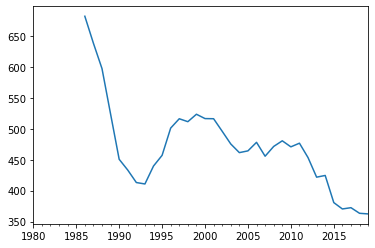

In [56]:
# 6. Calculate the average value of the column for a rolling window of size 7
snow.resample('Y').sum().rolling(7, min_periods=7).mean().plot()

In [57]:
# 7. Use .loc to pull out the first 3 months of a year
snow.loc['2019-01-01':'2019-03-31']

2019-01-01     0.0
2019-01-02     0.0
2019-01-03     0.0
2019-01-04     0.0
2019-01-05     0.0
              ... 
2019-03-27     0.0
2019-03-28     0.0
2019-03-29    20.7
2019-03-30     0.7
2019-03-31     0.0
Name: SNOW, Length: 90, dtype: float64

In [58]:
# 8. Use .loc to pull out the last 4 months of a year
snow.loc['2019-8-1':'2019-12-31']

2019-08-01    0.0
2019-08-02    0.0
2019-08-03    0.0
2019-08-04    0.0
2019-08-05    0.0
2019-08-06    0.0
2019-08-07    0.0
2019-08-09    0.0
2019-08-10    0.0
2019-08-11    0.0
2019-08-12    0.0
2019-08-13    0.0
2019-08-14    0.0
2019-08-15    0.0
2019-08-16    0.0
2019-08-17    0.0
2019-08-18    0.0
2019-08-19    0.0
2019-08-20    0.0
2019-08-21    0.0
2019-08-22    0.0
2019-08-23    0.0
2019-08-24    0.0
2019-08-25    0.0
2019-08-26    0.0
2019-08-27    0.0
2019-08-28    0.0
2019-08-29    0.0
2019-08-30    0.0
2019-08-31    0.0
2019-09-01    0.0
2019-09-02    0.0
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, dtype: float64

In [59]:
# 9. Use a mask to pull out first 3 months of year average
def first_3m(idx):
    month = idx.month
    period = idx.to_period('M')
    return period.where(month<=3)

snow.groupby(first_3m).sum().resample('Y').agg(['mean','max','min','std'])


,mean,max,min,std
1980,126.500000,144.0,112.5,16.039015
1981,88.333333,110.0,73.0,19.295941
1982,130.666667,164.0,85.0,40.918618
1983,101.166667,160.0,68.0,51.088975
1984,77.000000,104.0,42.0,31.764760
1985,68.333333,99.5,44.0,28.373990
1986,89.566667,112.7,56.0,29.755056
1987,52.000000,63.0,33.5,16.116761
1988,58.266667,74.3,27.5,26.652642
1989,67.500000,82.5,58.0,13.143439


In [60]:
# Chapter 14 Plotting with a Series

<AxesSubplot:title={'center':'Snowfall Histrogram (in)'}, ylabel='Frequency'>

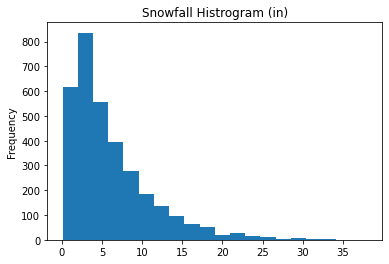

In [61]:
%matplotlib inline
snow[snow>0].plot.hist(bins=20, title = 'Snowfall Histrogram (in)')

<AxesSubplot:>

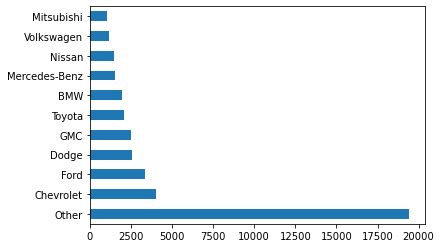

In [62]:
top10 = make.value_counts().index[:10]
make.where(make.isin(top10), 'Other').value_counts().plot.barh()

In [63]:
cats = pd.CategoricalDtype(sorted(make.unique()), ordered=True)
ordered_make = make.astype(cats)
ordered_make.sort_values()

20288    AM General
20289    AM General
369      AM General
358      AM General
19314    AM General
            ...    
31289         smart
31290         smart
29605         smart
22974         smart
26882         smart
Name: make, Length: 41144, dtype: category
Categories (136, object): ['AM General' < 'ASC Incorporated' < 'Acura' < 'Alfa Romeo' ... 'Volvo' < 'Wallace Environmental' < 'Yugo' < 'smart']

In [64]:
def generalize_topn(s, n=5, other='Other'):
    topn=s.value_counts().index[:n]
    if isinstance(s.dtype, pd.CategoricalDtype):
        s=s.cat.set_categories(
                               topn.set_categories(list(topn)+[other])
                              )
    return s.where(s.isin(topn), other)

ordered_make.pipe(generalize_topn, n=20, other='NA')

0            NA
1            NA
2         Dodge
3         Dodge
4        Subaru
          ...  
41139    Subaru
41140    Subaru
41141    Subaru
41142    Subaru
41143    Subaru
Name: make, Length: 41144, dtype: category
Categories (21, object): ['Chevrolet' < 'Ford' < 'Dodge' < 'GMC' ... 'Volvo' < 'Hyundai' < 'Chrysler' < 'NA']

In [65]:
print(make.memory_usage(deep=True))

def generalize_mapping(s, mapping, default):
    seen = None
    res = s.astype(str)
    for old, new in mapping.items():
        mask = s.str.contains(old)
        if seen is None:
            seen = mask
        else:
            seen |= mask
        res = res.where(~mask, new)
    res = res.where(seen,default)
    return res.astype('category')

mapped_make = generalize_mapping(ordered_make, 
                                {'Ford':'US', 'Tesla':'US', 'Chevrolet':'US', 
                                'Dodge':'US', 'Oldsmobile':'US', 'Plymouth':'US', 
                                'BMW':'German'}, 'Other'
                                )
print(ordered_make.memory_usage(deep=True))
print(mapped_make.memory_usage(deep=True))

2606395
95888
41564


In [66]:
# Chapter 16 Data frames
df = pd.DataFrame(mapped_make.value_counts())
df.reset_index(inplace=True)
df.rename(columns={'index':'country'}, inplace=True)
df['country'] = df['country'].astype('string')

In [67]:
# Chapter 17 Similarities between Series and Data Frames
url = 'https://en.wikipedia.org/wiki/'\
      'Historical_rankings_of_presidents_of_the_United_States'
pres_dfs = pd.read_html(url)
df = pres_dfs[8]
idx = df.axes[1].get_level_values(1).to_list()
df.columns = idx
df = df.loc[1:45]
for idx,column in enumerate(df.columns[3:]):
      df[column] = df[column].astype('int64')

df.loc[df['President']=='Grover Cleveland','Seq.'] = 22
df

/var/folders/_x/bt6gw2851b50zn7352f1qs_40000gn/T/ipykernel_6579/1737986034.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype('int64')


,Seq.,President,Political party,Bg,Im,Int,IQ,L,WR,AC,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,PV,O
1,1,George Washington,Independent,6,6,3,12,1,5,3,...,18,3,1,4,1,4,2,1,3,3
2,2,John Adams,Federalist,5,16,5,4,26,20,35,...,31,33,8,15,17,18,17,20,14,16
3,3,Thomas Jefferson,Democratic-Republican,7,4,20,2,5,8,14,...,4,5,11,20,7,6,10,8,7,5
4,4,James Madison,Democratic-Republican,4,7,9,3,13,15,11,...,10,10,14,19,11,13,20,11,11,10
5,5,James Monroe,Democratic-Republican,13,15,16,21,8,14,7,...,17,9,15,12,13,9,6,6,12,12
6,6,John Quincy Adams,Democratic-Republican,2,11,7,5,25,19,28,...,29,35,17,13,18,20,15,13,18,17
7,7,Andrew Jackson,Democratic,38,17,37,32,6,4,41,...,5,21,35,30,26,22,29,27,26,23
8,8,Martin Van Buren,Democratic,22,24,30,25,37,28,20,...,15,30,27,36,27,30,25,25,29,29
9,9,William Henry Harrison,Whig,32,39,29,34,45,40,38,...,38,41,42,42,41,41,42,37,39,40
10,10,John Tyler,Independent,35,37,39,36,31,33,42,...,43,43,40,37,39,36,27,36,37,39


In [68]:
def tweak_data(df):
    def int64_to_uint8(df_):
        cols = df_.select_dtypes('int64')
        return (df_.astype({col:'uint8' for col in cols}))

    return (df.rename(columns={'Seq.':'Seq'})\
            .rename(columns={k:v.replace(' ','_') for k,v in
                    {'Bg':'Background',
                    'PL':'Party leadership', 'CAb':'Communication ability',
                    'RC':'Relations with Congress', 'CAp':'Court appointments',
                    'HE':'Handling of economy', 'L':'Luck',
                    'AC':'Ability to compromise', 'WR':'Willing to take risks',
                    'EAp':'Executive appointments', 'OA':'Overall ability',
                    'Im':'Imagination', 'DA':'Domestic accomplishments',
                    'Int':'Integrity', 'EAb':'Executive ability',
                    'FPA':'Foreign policy accomplishments',
                    'LA':'Leadership ability',
                    'IQ':'Intelligence', 'AM':'Avoid crucial mistakes',
                    'PV':'Experts view', 'O':'Overall'}.items()}
                   )\
            .astype({'Political party':'category'})\
            .pipe(int64_to_uint8)\
            .assign(Average_rank=lambda df_:(df_.select_dtypes('uint8')
                        .sum(axis=1).rank(method='dense').astype('uint8')),
                    Quartile=lambda df_:pd.qcut(df_.Average_rank, 4,
                        labels='1st 2nd 3rd 4th'.split(), duplicates='drop')
                    )
           )

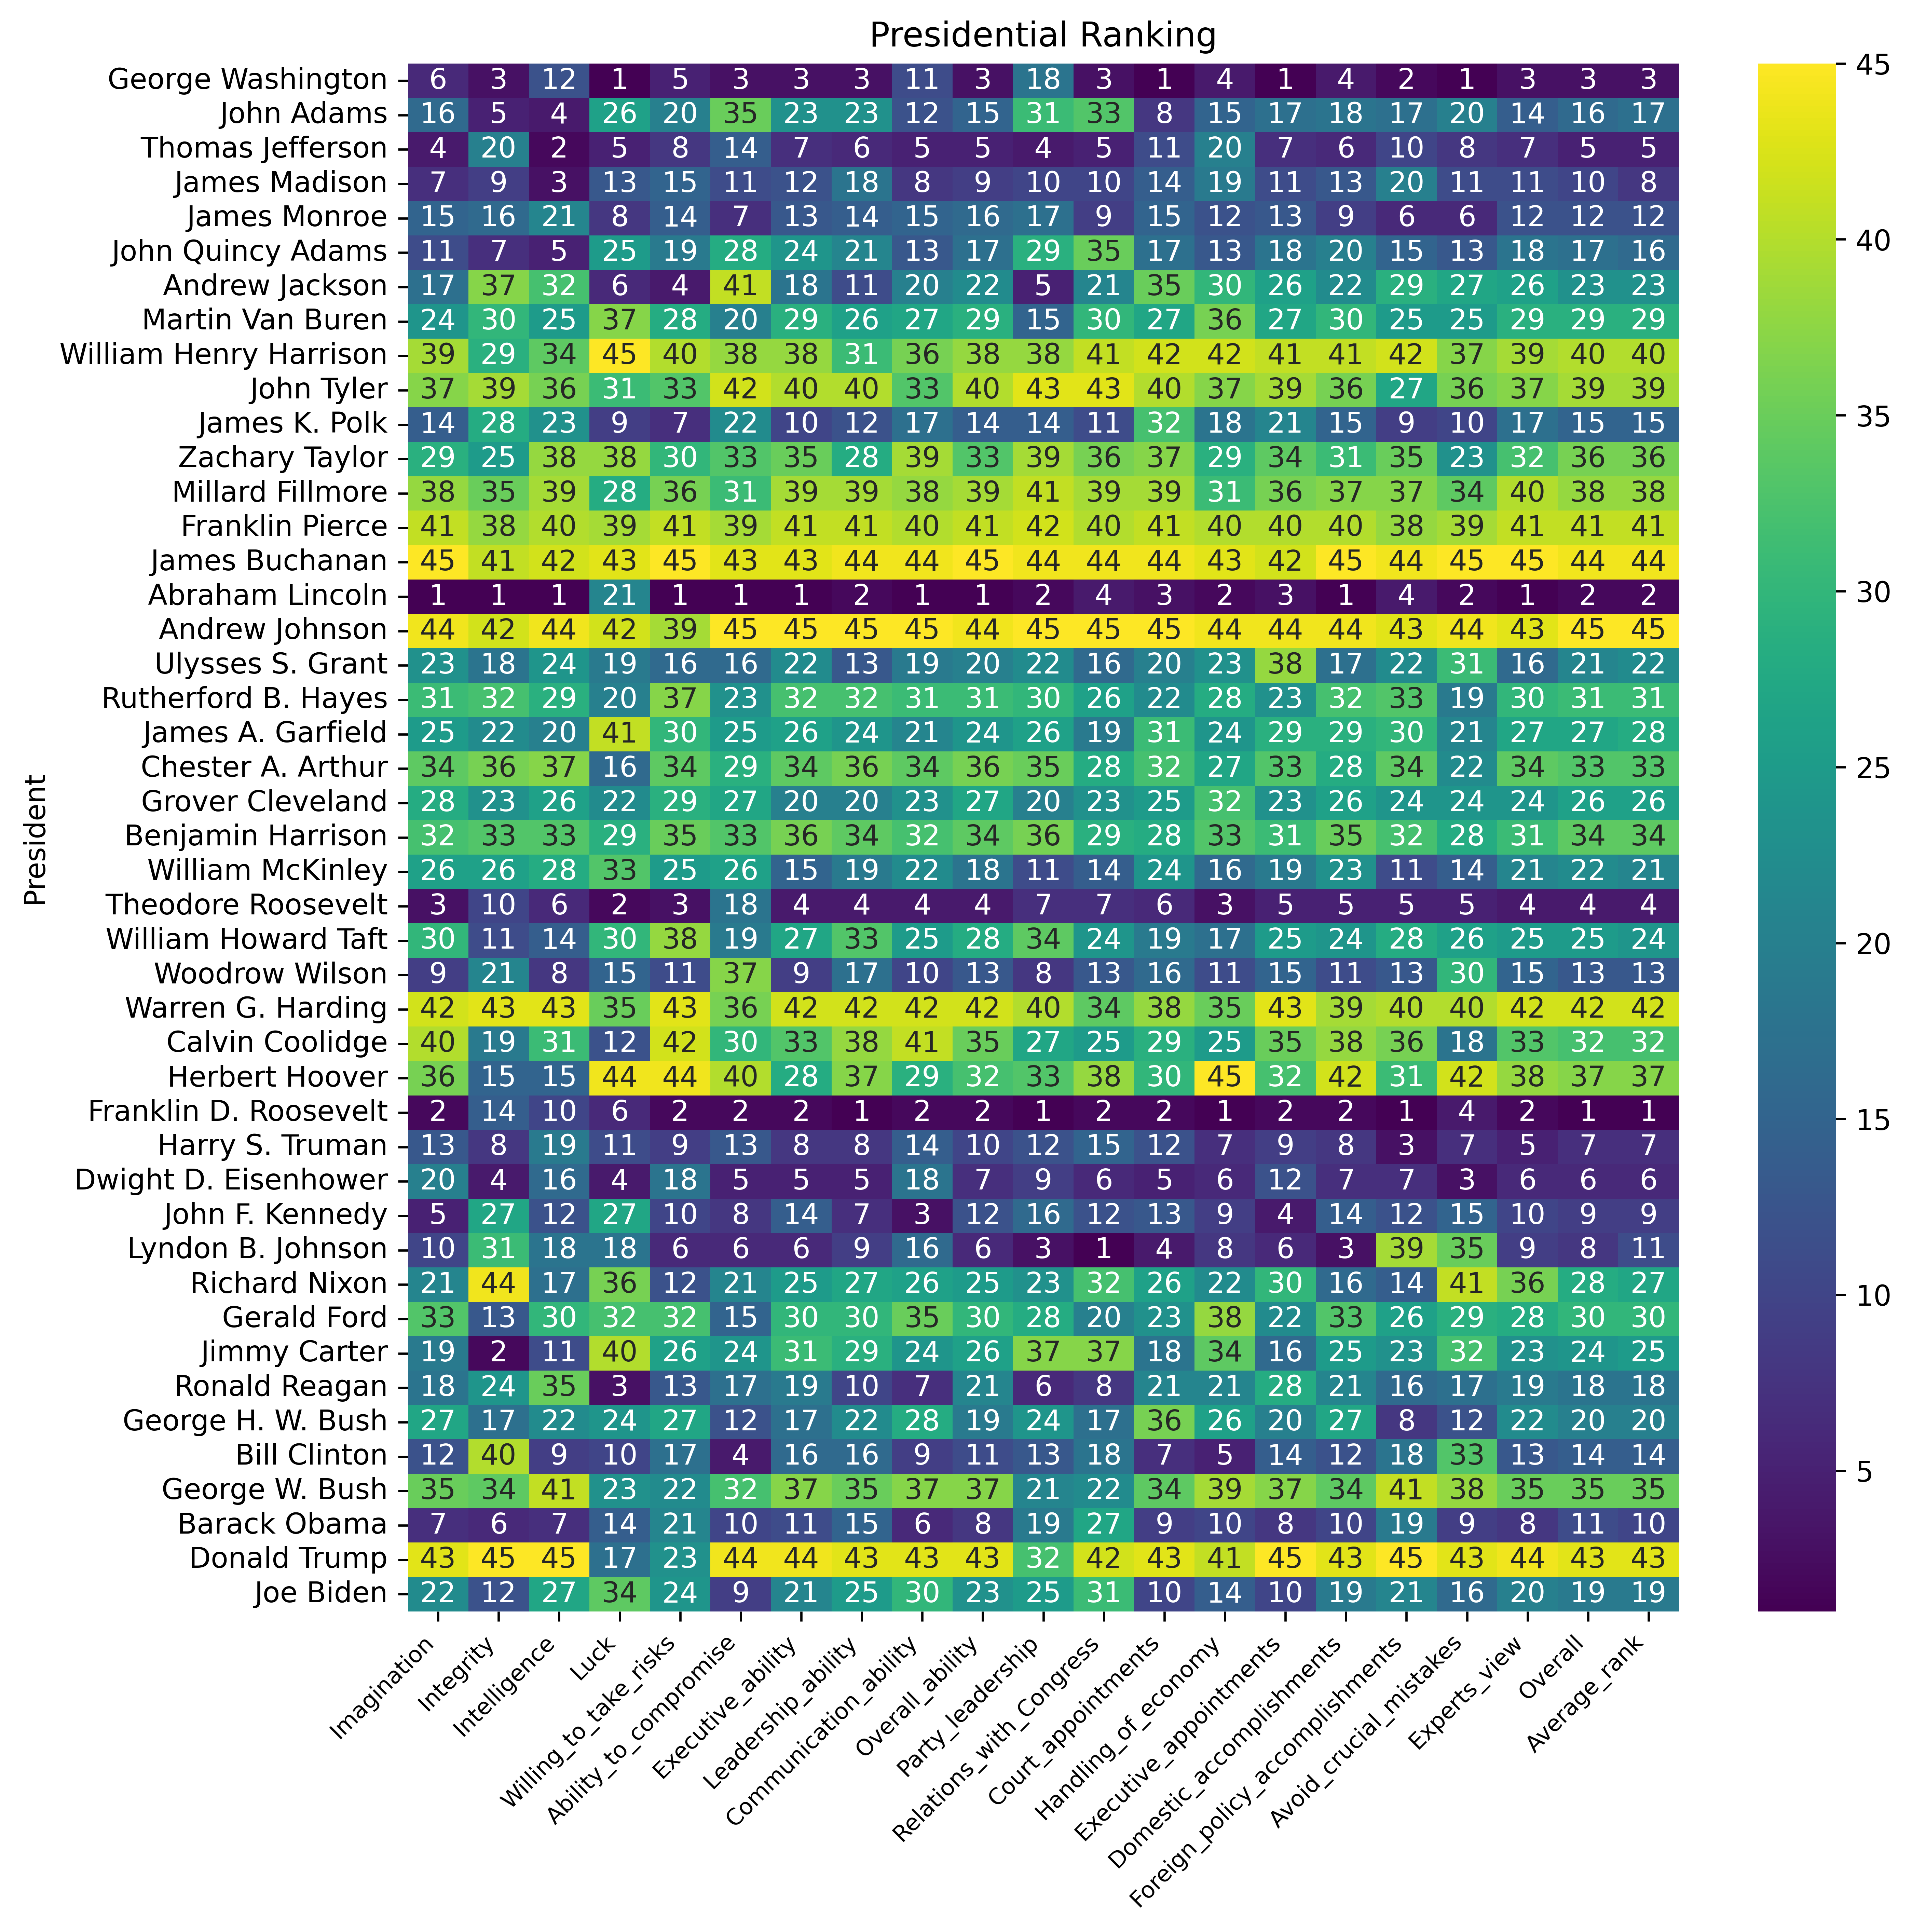

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,10), dpi=600)
g = sns.heatmap((tweak_data(df)
    .set_index('President')
    .iloc[:, 3:-1]
    ), annot=True, cmap='viridis', ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=8,
                  ha='right')
_=plt.title('Presidential Ranking')


In [70]:
df.sample(30)

,Seq.,President,Political party,Bg,Im,Int,IQ,L,WR,AC,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,PV,O
24,25,William McKinley,Republican,23,26,26,28,33,25,26,...,11,14,24,16,19,23,11,14,21,22
1,1,George Washington,Independent,6,6,3,12,1,5,3,...,18,3,1,4,1,4,2,1,3,3
36,37,Richard Nixon,Republican,17,21,44,17,36,12,21,...,23,32,26,22,30,16,14,41,36,28
33,34,Dwight D. Eisenhower,Republican,11,20,4,16,4,18,5,...,9,6,5,6,12,7,7,3,6,6
26,27,William Howard Taft,Republican,10,30,11,14,30,38,19,...,34,24,19,17,25,24,28,26,25,25
4,4,James Madison,Democratic-Republican,4,7,9,3,13,15,11,...,10,10,14,19,11,13,20,11,11,10
12,12,Zachary Taylor,Whig,40,29,25,38,38,30,33,...,39,36,37,29,34,31,35,23,32,36
42,43,George W. Bush,Republican,20,35,34,41,23,22,32,...,21,22,34,39,37,34,41,38,35,35
8,8,Martin Van Buren,Democratic,22,24,30,25,37,28,20,...,15,30,27,36,27,30,25,25,29,29
34,35,John F. Kennedy,Democratic,12,5,27,12,27,10,8,...,16,12,13,9,4,14,12,15,10,9


In [71]:
# Chapter 18 Math Methods in Dataframes
pres = tweak_data(df)
#1 Loop over rows and calculate the max and min values
for idx, row in pres.iterrows():
    maximum = row['Background':'Average_rank'].max()
    minimum = row['Background':'Average_rank'].min()
    pres.loc[idx, 'Max'] = maximum
    pres.loc[idx, 'Min'] = minimum

pres

,Seq,President,Political party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts_view,Overall,Average_rank,Quartile,Max,Min
1,1,George Washington,Independent,6,6,3,12,1,5,3,...,1,4,2,1,3,3,3,1st,18.0,1.0
2,2,John Adams,Federalist,5,16,5,4,26,20,35,...,17,18,17,20,14,16,17,2nd,35.0,4.0
3,3,Thomas Jefferson,Democratic-Republican,7,4,20,2,5,8,14,...,7,6,10,8,7,5,5,1st,20.0,2.0
4,4,James Madison,Democratic-Republican,4,7,9,3,13,15,11,...,11,13,20,11,11,10,8,1st,20.0,3.0
5,5,James Monroe,Democratic-Republican,13,15,16,21,8,14,7,...,13,9,6,6,12,12,12,1st,21.0,6.0
6,6,John Quincy Adams,Democratic-Republican,2,11,7,5,25,19,28,...,18,20,15,13,18,17,16,2nd,35.0,2.0
7,7,Andrew Jackson,Democratic,38,17,37,32,6,4,41,...,26,22,29,27,26,23,23,2nd,41.0,4.0
8,8,Martin Van Buren,Democratic,22,24,30,25,37,28,20,...,27,30,25,25,29,29,29,3rd,37.0,15.0
9,9,William Henry Harrison,Whig,32,39,29,34,45,40,38,...,41,41,42,37,39,40,40,4th,45.0,29.0
10,10,John Tyler,Independent,35,37,39,36,31,33,42,...,39,36,27,36,37,39,39,4th,43.0,27.0


In [72]:
#2. Calculate the max and min of each column and row using the .agg method
pres[['maximum','minimum']]=pres.loc[:,'Background':'Average_rank'].agg(['max', 'min'], axis=1)
pres

,Seq,President,Political party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts_view,Overall,Average_rank,Quartile,Max,Min,maximum,minimum
1,1,George Washington,Independent,6,6,3,12,1,5,3,...,2,1,3,3,3,1st,18.0,1.0,18,1
2,2,John Adams,Federalist,5,16,5,4,26,20,35,...,17,20,14,16,17,2nd,35.0,4.0,35,4
3,3,Thomas Jefferson,Democratic-Republican,7,4,20,2,5,8,14,...,10,8,7,5,5,1st,20.0,2.0,20,2
4,4,James Madison,Democratic-Republican,4,7,9,3,13,15,11,...,20,11,11,10,8,1st,20.0,3.0,20,3
5,5,James Monroe,Democratic-Republican,13,15,16,21,8,14,7,...,6,6,12,12,12,1st,21.0,6.0,21,6
6,6,John Quincy Adams,Democratic-Republican,2,11,7,5,25,19,28,...,15,13,18,17,16,2nd,35.0,2.0,35,2
7,7,Andrew Jackson,Democratic,38,17,37,32,6,4,41,...,29,27,26,23,23,2nd,41.0,4.0,41,4
8,8,Martin Van Buren,Democratic,22,24,30,25,37,28,20,...,25,25,29,29,29,3rd,37.0,15.0,37,15
9,9,William Henry Harrison,Whig,32,39,29,34,45,40,38,...,42,37,39,40,40,4th,45.0,29.0,45,29
10,10,John Tyler,Independent,35,37,39,36,31,33,42,...,27,36,37,39,39,4th,43.0,27.0,43,27


In [73]:
#3. Calculate the min and max of each row and column using the .apply method
pres.loc[:,'Background':].apply(lambda x: x.max(), axis=0) # columns
pres.loc[:,'Background':'Average_rank'].apply(lambda x: x.max(), axis=1) # rows


1     18
2     35
3     20
4     20
5     21
6     35
7     41
8     37
9     45
10    43
11    32
12    40
13    42
14    42
15    45
16    29
17    45
18    38
19    37
20    41
21    39
22    34
23    36
24    33
25    18
26    38
27    37
28    43
29    42
30    45
31    14
32    28
33    20
34    27
35    39
36    44
37    38
38    40
39    36
40    36
41    40
42    41
43    27
44    45
45    34
dtype: int8

In [74]:
#Chapter 20 - memory usage
#1. Convert numeric column - did we save or use more memory? Precision?
pres['Background'].astype('uint8').memory_usage(deep=True)

177

In [75]:
#2. Convert string column to cat - what happened to memory usage? Time string operations
str_mem = pres['Political party'].astype('string').memory_usage(deep=True)
cat_mem = pres['Political party'].astype('category').memory_usage(deep=True)

print(f"String: {str_mem}\nCategory: {cat_mem}")

String: 3175
Category: 757


In [76]:
%%timeit
pres['Political party'].astype('string').replace('Republican','Dodos')

516 µs ± 96.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [77]:
%%timeit
pres['Political party'].astype('category').replace('Republican','Dodos')

19.1 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [184]:
# Chapter 21 - Creating and updating columns
import numpy as np
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
      '2020-jetbrains-python-survey.csv'
jb_orig = pd.read_csv(url, low_memory=False)

In [277]:
# Filter out 'database columns' and clean data
jb=jb_orig.copy()
import collections
counter = collections.defaultdict(list)
for col in sorted(jb.columns):
    period_count = col.count('.')
    if period_count >= 2:
        part_end = 2
    else:
        part_end = 1
    parts = col.split('.')[:part_end]
    counter['.'.join(parts)].append(col)

unique_cols = []
for cols in counter.values():
    if len(cols) == 1:
        unique_cols.extend(cols)

jb=\
(jb[unique_cols].rename(columns = lambda c: c.replace('.','_'))\
                .assign(age = lambda df_: df_.age
                                             .str[0:2]\
                                             .astype(float)\
                                             .astype('Int64'),
                       are_you_datascientist = lambda df_: df_.are_you_datascientist\
                                                              .replace({'Yes': True, 'No':False, np.nan:False}),
                       company_size = lambda df_: df_.company_size.replace({
                                                  'Just me':1, 'Not sure':np.nan,\
                                                  'More than 5,000':5000, '2–10':2,\
                                                  '11–50':11, '51–500':51, '501–1,000':501,\
                                                  '1,001–5,000':1001}).astype('Int64'),
                       country_live = lambda df_: df_.employment_status.fillna('Other').astype('category'),
                       employment_status = lambda df_: df_.employment_status.fillna('Other').astype('category'),
                       is_python_main = lambda df_: df_.is_python_main.astype('category'),
                       team_size = lambda df_: df_.team_size.str.split(r'-', n=1, expand=True).iloc[:,0]\
                                                  .replace('More than 40 people', 41)\
                                                  .where(df_.company_size!=1, 1).astype(float),
                       years_of_coding = lambda df_:df_.years_of_coding\
                                                       .replace('Less than 1 year', .5).str.extract(r'(\d+)')\
                                                       .astype(float),
                       python_years = lambda df_:df_.python_years\
                                                    .replace('Less than 1 year', .5).str.extract(r'(\d+)')\
                                                    .astype(float),
                       python3_ver = lambda df_:df_.python3_version_most\
                                                   .str.replace('_','.').str.extract((r'(\d.\d)'))\
                                                   .astype(float),
                       use_python_most = lambda df_:df_.use_python_most.fillna('Unknown')
                       )
)


In [279]:
# Looks like there are a lot of missing 'team size' fields. Use CatBoost ML to fill in.
jb.query('team_size.isna()')\
  .employment_status\
  .value_counts(dropna=False)

Fully employed by a company / organization                                                        5279
Working student                                                                                    696
Partially employed by a company / organization                                                     482
Self-employed (a person earning income directly from one's own business, trade, or profession)     430
Freelancer (a person pursuing a profession without a long-term commitment to any one employer)       0
Other                                                                                                0
Retired                                                                                              0
Student                                                                                              0
Name: employment_status, dtype: int64